In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle

In [2]:
df=pd.read_csv(r"C:\Users\tanji\Desktop\myPW\end to endprojects\Diabetes_Predictor\Dataset\Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

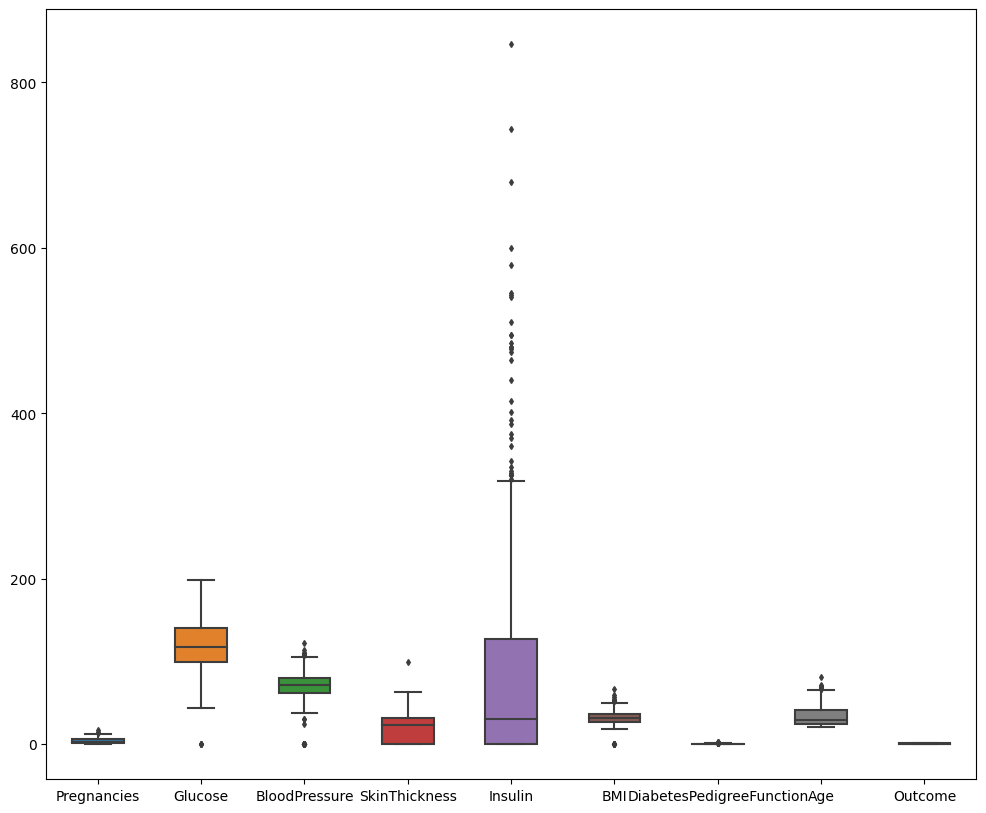

In [5]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df,width=0.5,fliersize=3) #check for outlier
#flier gives the size of outlier markers

- we see that Glucos, BloodPressure, SkinThickness, Insulin, BMI have minimum values as 0 which is not possible
- Thus we will replace it with mean values
- There are many outliers in Insulin

In [6]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

<Axes: >

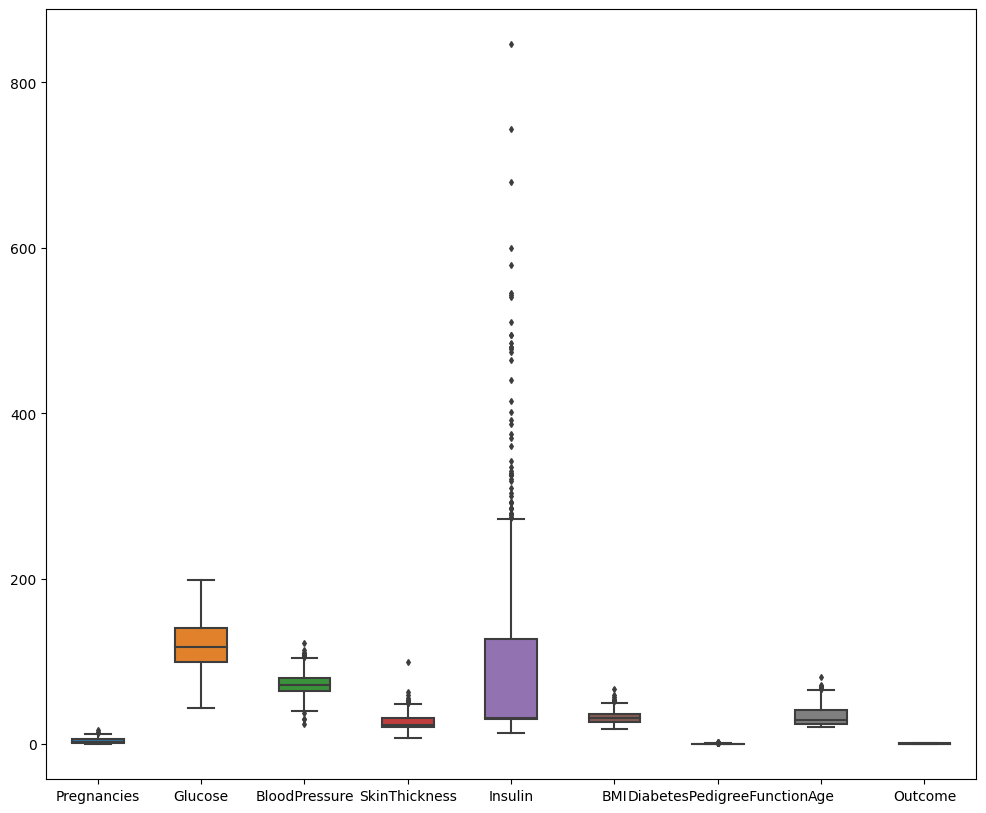

In [7]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df,width=0.5,fliersize=3) #check for outlier
#flier gives the size of outlier markers

In [8]:
x=df.drop(columns=['Outcome'])  #or axis=1
y=df['Outcome']

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

x_train.shape,x_test.shape

((576, 8), (192, 8))

In [10]:
import pickle
import os

def scale(x_train,x_test):
    #scaling
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.transform(x_test)
    
    #saving model on disk
    os.makedirs('../models/', exist_ok=True) #making directory if not available
    with open('../models/scaler.pkl','wb') as f:
        pickle.dump(scaler,f)
    
    return x_train_scaled,x_test_scaled

In [11]:
x_train_scaled,x_test_scaled=scale(x_train,x_test)

## Decision tree

In [69]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#hyperparameter tuning 

parameters={
    'criterion':('gini','entropy','log_loss'),
    'splitter':['best','random'],
    'max_depth':(1,2,3,4,5),
    'max_features':['auto','sqrt','log2']
}

clf=GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,scoring='accuracy',cv=3, verbose=3)
clf.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.766 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.708 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.656 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.771 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.719 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.656 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.672 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.708 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitte

[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.693 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.677 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.656 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.656 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.656 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, splitter=best;, score=0.766 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, splitter=best;, score=0.693 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, splitter=best;, score=0.656 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, splitter=random;, score=0.682 total time= 

[CV 3/3] END criterion=log_loss, max_depth=3, max_features=sqrt, splitter=random;, score=0.745 total time=   0.0s
[CV 1/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=0.766 total time=   0.0s
[CV 2/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=0.703 total time=   0.0s
[CV 3/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=0.740 total time=   0.0s
[CV 1/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.776 total time=   0.0s
[CV 2/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.667 total time=   0.0s
[CV 3/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.672 total time=   0.0s
[CV 1/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=0.724 total time=   0.0s
[CV 2/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=0.677 tot

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': (1, 2, 3, 4, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [70]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [71]:
clf.best_score_

0.7604166666666666

In [72]:
classifier=DecisionTreeClassifier(criterion= 'log_loss',max_depth= 5,max_features= 'log2',splitter= 'best')
classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2')

In [73]:
ypred=classifier.predict(x_test_scaled)

In [74]:
print(accuracy_score(y_test,ypred))

0.7447916666666666


In [75]:
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.77      0.85      0.81       123
           1       0.68      0.55      0.61        69

    accuracy                           0.74       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



In [76]:
print(confusion_matrix(y_test,ypred))

[[105  18]
 [ 31  38]]


In [77]:
with open('../models/DecisionTree.pkl','wb') as f: #saving decisiontree
    pickle.dump(classifier,f)

## SVM

In [78]:

parameters={
    'kernel':('linear','rbf','polynomial'),
    'gamma':[1,0.1,0.01,0.001,0.0001, 0.00001],
    'C':[0,1,10,]
}

clf=GridSearchCV(SVC(),param_grid=parameters,scoring='accuracy',cv=3, verbose=3)
clf.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 2/3] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 3/3] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 1/3] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/3] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/3] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/3] END .....C=0, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END .....C=0, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END .....C=0, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 2/3] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 3/3] END .......C=0, gamma=0.1, kernel=line

[CV 1/3] END ......C=10, gamma=1, kernel=linear;, score=0.802 total time=   0.0s
[CV 2/3] END ......C=10, gamma=1, kernel=linear;, score=0.745 total time=   0.0s
[CV 3/3] END ......C=10, gamma=1, kernel=linear;, score=0.745 total time=   0.0s
[CV 1/3] END .........C=10, gamma=1, kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/3] END .........C=10, gamma=1, kernel=rbf;, score=0.630 total time=   0.0s
[CV 3/3] END .........C=10, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 1/3] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.802 total time=   0.0s
[CV 2/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.745 total time=   0.0s
[CV 3/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.745 total time=   0.0s
[CV 1/3] END .......C=10, ga

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ('linear', 'rbf', 'polynomial')},
             scoring='accuracy', verbose=3)

In [79]:
clf.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [80]:
clf.best_score_

0.7725694444444445

In [81]:
classifier2=SVC(C= 10, gamma= 0.001, kernel= 'rbf')
classifier2.fit(x_train_scaled,y_train)

SVC(C=10, gamma=0.001)

In [82]:
ypred=classifier2.predict(x_test_scaled)

In [83]:
print(accuracy_score(y_test,ypred))

0.7395833333333334


In [84]:
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.78      0.83      0.80       123
           1       0.66      0.58      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.73      0.74      0.74       192



In [85]:
print(confusion_matrix(y_test,ypred))

[[102  21]
 [ 29  40]]


In [86]:

with open('../models/SVC.pkl','wb') as f: #saving SVC
    pickle.dump(classifier2,f)

## Logistic regression

In [87]:
from sklearn.linear_model import LogisticRegression
parameters={
    'penalty':('l1','l2','elasticnet'),
    'C':np.logspace(-3,3,100),
    'solver':('newton-cg','lbfgs','liblinear')
}

clf=GridSearchCV(LogisticRegression(),param_grid=parameters,scoring='accuracy',cv=10)
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284...
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear')},
             scoring='accuracy')

In [88]:
clf.best_params_  #best parameters

{'C': 0.010722672220103232, 'penalty': 'l2', 'solver': 'liblinear'}

In [89]:
clf.best_score_

0.7776467029643073

In [90]:
log_reg=LogisticRegression(C= 0.010722672220103232, penalty= 'l2', solver= 'liblinear')

log_reg.fit(x_train_scaled,y_train)

LogisticRegression(C=0.010722672220103232, solver='liblinear')

In [91]:
y_pred=log_reg.predict(x_test_scaled)

In [92]:
con_mat=confusion_matrix(y_test,y_pred)
con_mat

array([[93, 30],
       [26, 43]], dtype=int64)

In [93]:
TP=con_mat[0][0]
FP=con_mat[0][1]
TN=con_mat[1][0]
FN=con_mat[1][1]

In [94]:
accuracy=(TP+TN)/(TP+TN+FP+FN)  
print("Accuracy: ",accuracy)

Accuracy:  0.6197916666666666


In [95]:
recall=TP/(TP+FN)
print("Recall: ",recall)

Recall:  0.6838235294117647


In [96]:
precision=TP/(TP+FP)
print("Precision: ",precision)

Precision:  0.7560975609756098


In [99]:
with open('../models/LogisticReg.pkl','wb') as f:
    pickle.dump(log_reg,f)   #saving model on disk

## Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB


classifier3=GaussianNB()
classifier3.fit(x_train_scaled,y_train)

GaussianNB()

In [102]:
y_pred=classifier3.predict(x_test_scaled)

In [108]:
print(accuracy_score(y_test,y_pred))

0.7239583333333334


In [107]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.80      0.76      0.78       123
           1       0.61      0.65      0.63        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192



In [106]:
print(confusion_matrix(y_test,y_pred))

[[94 29]
 [24 45]]


In [109]:
with open('../models/GaussianNB.pkl','wb') as f:
    pickle.dump(log_reg,f)   #saving model on disk